1]Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
df=pd.read_csv('Fraud_check.csv')

In [ ]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)


In [ ]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])



In [ ]:
print(df)


     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [ ]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)



In [ ]:
#Viewing buttom 10 observations
df.tail(10)


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


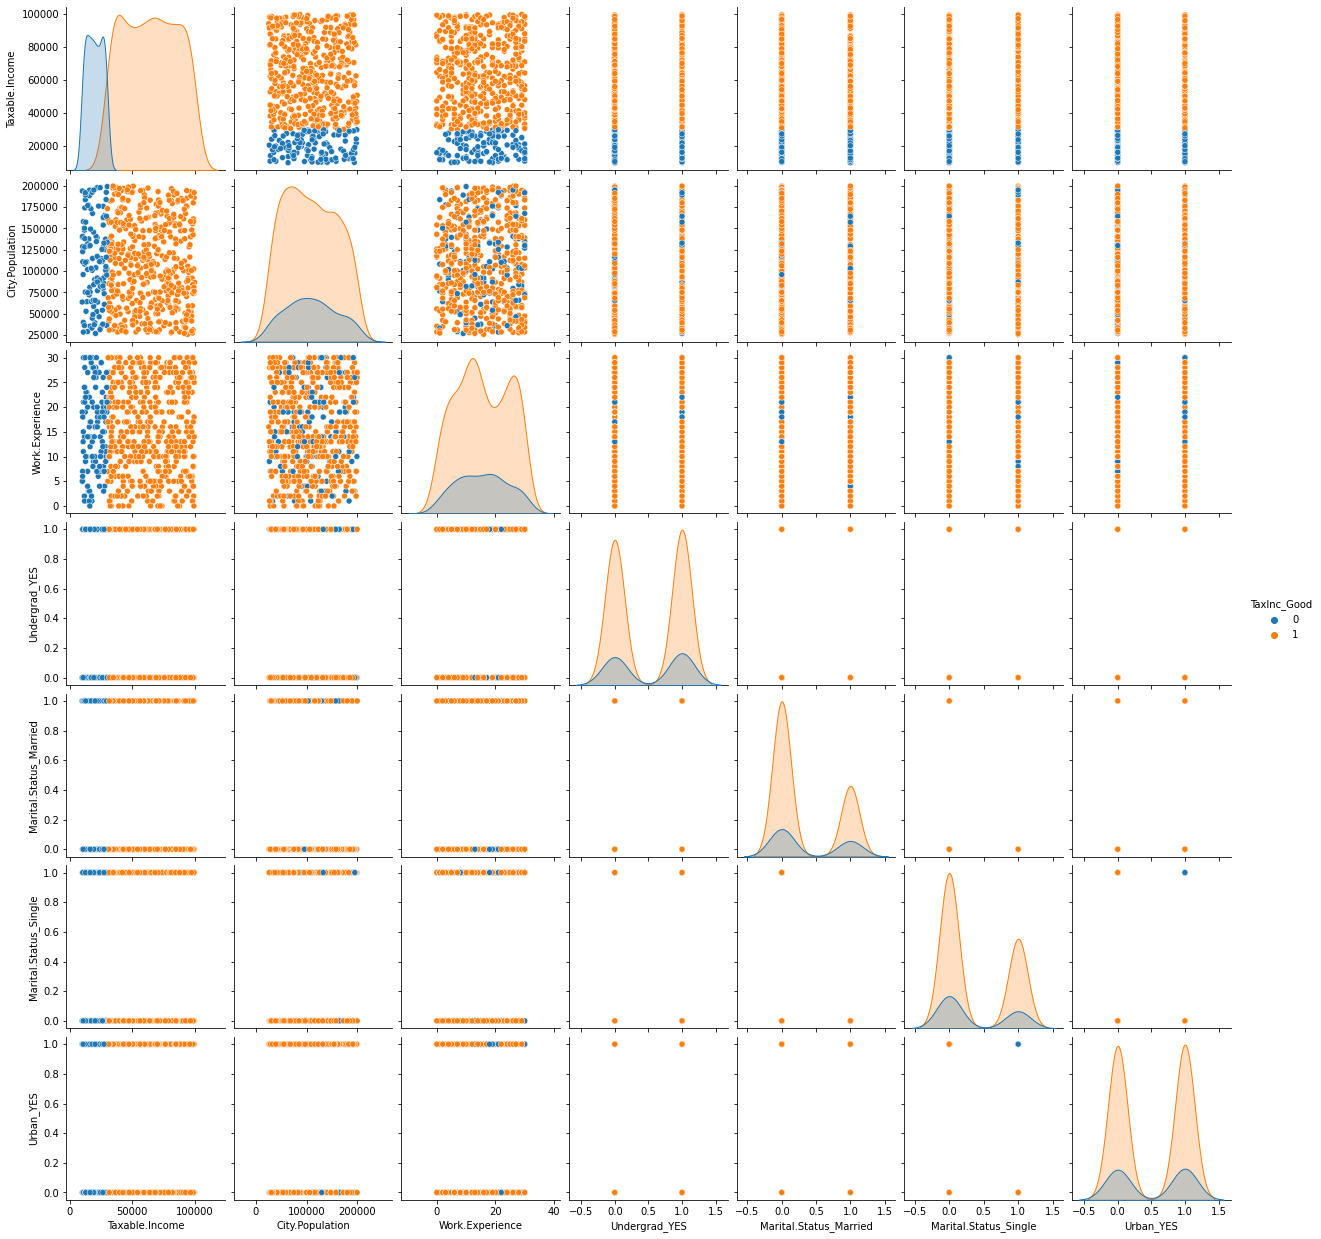

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


     

In [ ]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"


     


In [ ]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)


In [ ]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass


In [ ]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [ ]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)



In [ ]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [ ]:
model.oob_score_

0.5333333333333333

In [ ]:
##Predictions on train data
prediction = model.predict(x_train)

In [ ]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)



In [ ]:
np.mean(prediction == y_train)

0.99375

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)



In [ ]:
##Prediction on test data
pred_test = model.predict(x_test)


In [ ]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)



In [ ]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [ ]:
tree = model.estimators_[5]


In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)


In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree


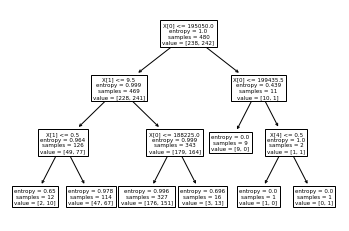

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


In [ ]:
colnames = list(df.columns)
colnames


['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

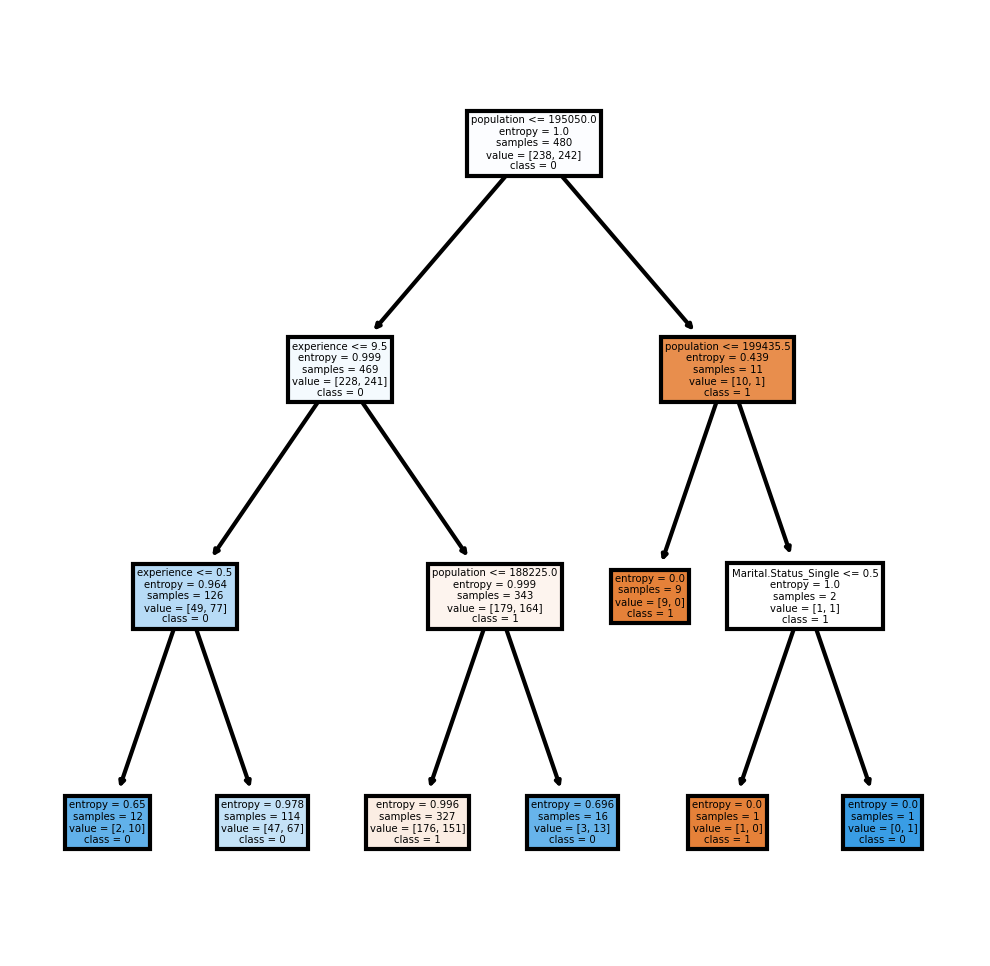

In [ ]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    83
1    37
dtype: int64

In [ ]:
preds

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1
Urban_YES,,
0,43,17
1,40,20


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.525

Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [ ]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.525

Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)


-0.8797468354430387

2]About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

Company_Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving Company_Data.csv to Company_Data.csv


In [ ]:
df=pd.read_csv('Company_Data.csv')

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [ ]:
df=pd.get_dummies(df,columns=['US','Urban'], drop_first=True)



In [ ]:
df["Price"] = pd.cut(df["Price"], bins = [10002,30000,99620], labels = ["Bad", "Good"])


In [ ]:
print(df)

     Sales  CompPrice  Income  Advertising  Population Price ShelveLoc  Age  \
0     9.50        138      73           11         276   NaN       Bad   42   
1    11.22        111      48           16         260   NaN      Good   65   
2    10.06        113      35           10         269   NaN    Medium   59   
3     7.40        117     100            4         466   NaN    Medium   55   
4     4.15        141      64            3         340   NaN       Bad   38   
..     ...        ...     ...          ...         ...   ...       ...  ...   
395  12.57        138     108           17         203   NaN      Good   33   
396   6.14        139      23            3          37   NaN    Medium   55   
397   7.41        162      26           12         368   NaN    Medium   40   
398   5.94        100      79            7         284   NaN       Bad   50   
399   9.71        134      37            0          27   NaN      Good   49   

     Education  US_Yes  Urban_Yes  
0           17 

In [ ]:
df = pd.get_dummies(df,columns = ["Price"],drop_first=True)


In [ ]:
#Viewing buttom 10 observations
df.tail(10)

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Age,Education,US_Yes,Urban_Yes,Price_Good
390,5.47,108,75,9,61,Medium,67,12,1,1,0
391,6.10,153,63,0,49,Bad,56,16,0,1,0
392,4.53,129,42,13,315,Bad,34,13,1,1,0
393,5.57,109,51,10,26,Medium,30,17,1,0,0
394,5.35,130,58,19,366,Bad,33,16,1,1,0
395,12.57,138,108,17,203,Good,33,14,1,1,0
396,6.14,139,23,3,37,Medium,55,11,1,0,0
397,7.41,162,26,12,368,Medium,40,18,1,1,0
398,5.94,100,79,7,284,Bad,50,12,1,1,0
399,9.71,134,37,0,27,Good,49,16,1,1,0


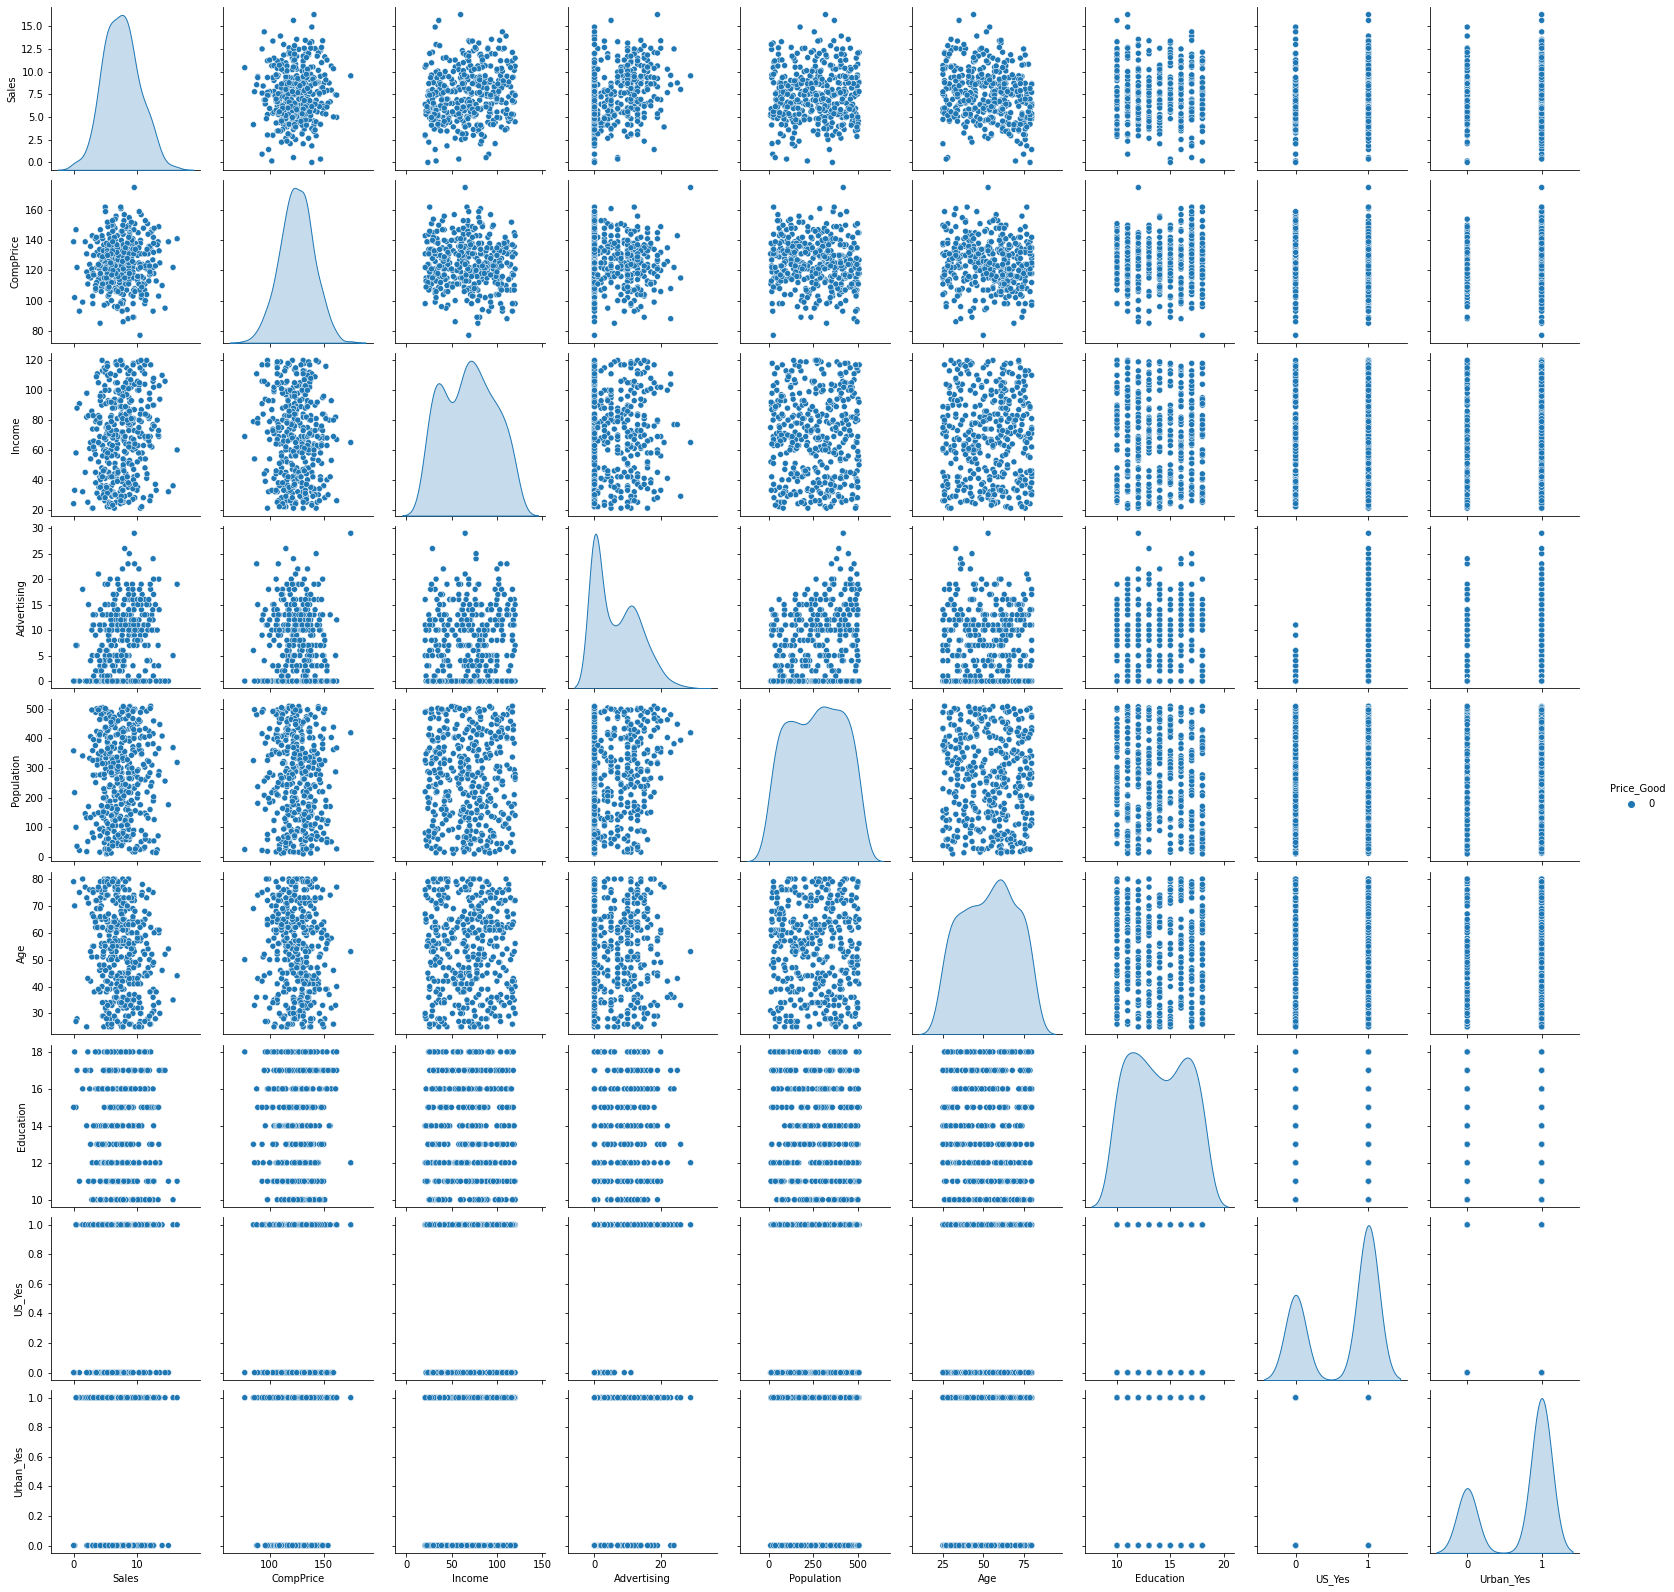

In [ ]:
import seaborn as sns
sns.pairplot(data=df, hue = 'Price_Good')


In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)



In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,6:])
df_norm.tail(10)


,Age,Education,US_Yes,Urban_Yes,Price_Good
390,0.763636,0.250,1.0,1.0,NaN
391,0.563636,0.750,0.0,1.0,NaN
392,0.163636,0.375,1.0,1.0,NaN
393,0.090909,0.875,1.0,0.0,NaN
394,0.145455,0.750,1.0,1.0,NaN
395,0.145455,0.500,1.0,1.0,NaN
396,0.545455,0.125,1.0,0.0,NaN
397,0.272727,1.000,1.0,1.0,NaN
398,0.454545,0.250,1.0,1.0,NaN
399,0.436364,0.750,1.0,1.0,NaN


In [ ]:
# Declaring features & target
X = df_norm.drop(['Price_Good'], axis=1)
y = df_norm['Price_Good']



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass


In [ ]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]


In [ ]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)



In [ ]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [ ]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


3

In [ ]:
model.oob_score_

0.54375

In [ ]:
##Predictions on train data
prediction = model.predict(x_train)

In [ ]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)


In [ ]:
np.mean(prediction == y_train)

0.99375

In [ ]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)


In [ ]:
##Prediction on test data
pred_test = model.predict(x_test)


In [ ]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)

In [ ]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO


In [ ]:
tree = model.estimators_[5]

In [ ]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)



In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
from sklearn import tree


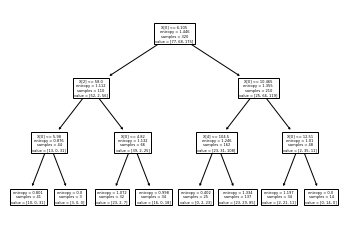

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


In [ ]:
colnames = list(df.columns)
colnames


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'ShelveLoc',
 'Age',
 'Education',
 'US_Yes',
 'Urban_Yes',
 'Price_Good']

[Text(0.5, 0.875, 'X[0] <= 6.105\nentropy = 1.446\nsamples = 320\nvalue = [77, 68, 175]'),
 Text(0.25, 0.625, 'X[2] <= 58.0\nentropy = 1.112\nsamples = 110\nvalue = [52, 2, 56]'),
 Text(0.125, 0.375, 'X[0] <= 5.98\nentropy = 0.876\nsamples = 44\nvalue = [13, 0, 31]'),
 Text(0.0625, 0.125, 'entropy = 0.801\nsamples = 41\nvalue = [10, 0, 31]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.375, 0.375, 'X[0] <= 4.82\nentropy = 1.132\nsamples = 66\nvalue = [39, 2, 25]'),
 Text(0.3125, 0.125, 'entropy = 1.072\nsamples = 32\nvalue = [23, 2, 7]'),
 Text(0.4375, 0.125, 'entropy = 0.998\nsamples = 34\nvalue = [16, 0, 18]'),
 Text(0.75, 0.625, 'X[0] <= 10.465\nentropy = 1.355\nsamples = 210\nvalue = [25, 66, 119]'),
 Text(0.625, 0.375, 'X[4] <= 104.5\nentropy = 1.246\nsamples = 162\nvalue = [23, 31, 108]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [0, 2, 23]'),
 Text(0.6875, 0.125, 'entropy = 1.334\nsamples = 137\nvalue = [23, 29, 85]'),
 Text

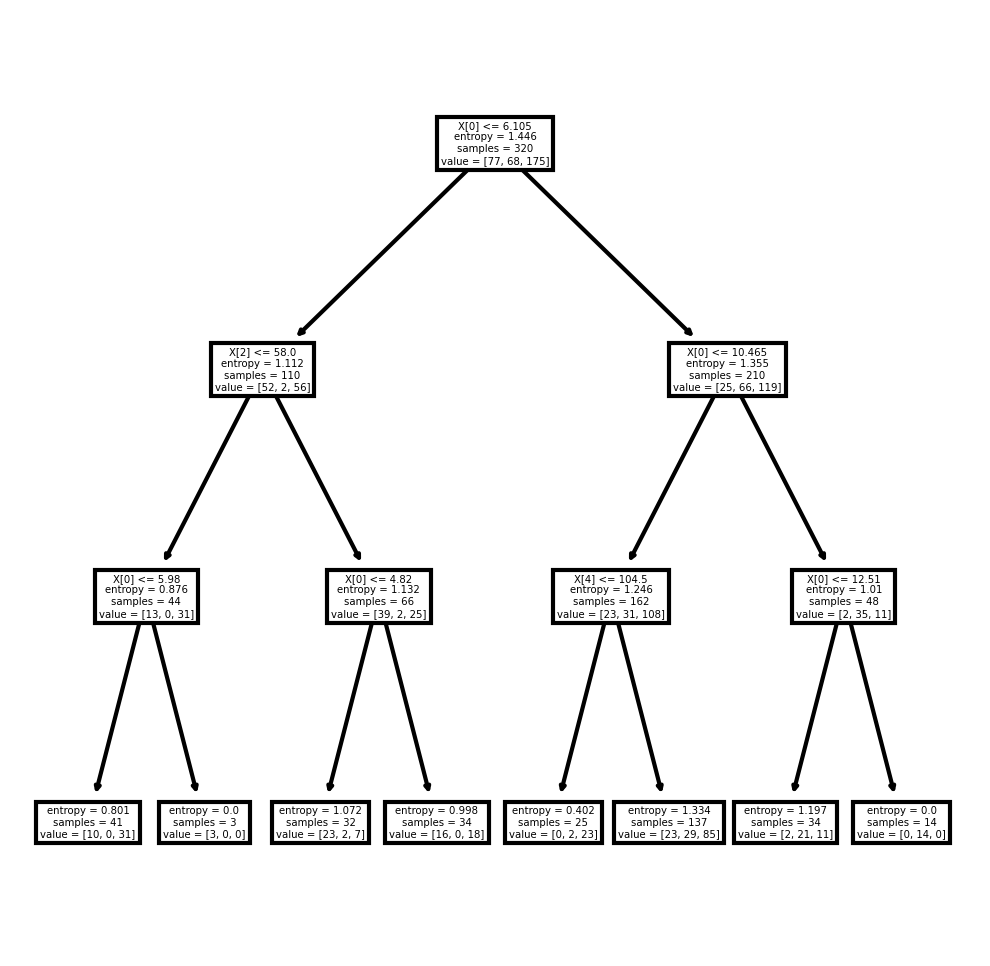

In [ ]:
fn=['Sales','CompPrice','Advertisting','Population','ShelveLoc','Age','Education','US_Yes','Price_Good']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 


2    59
1    15
0     6
dtype: int64

In [ ]:
preds

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions


col_0,0,1,2
ShelveLoc,,,
0,3,1,15
1,0,9,8
2,3,5,36


In [ ]:
# Accuracy 
np.mean(preds==y_test)


0.6

Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)


In [ ]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)


0.6

Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
array = df.values
X = array[:,0:5]
y = array[:,5]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


     


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)



DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)


-0.7970154463740291